In [149]:
#moeda: Lakhs de Rúpias Indianas (INR).
install.packages("readr")
install.packages("dplyr")
install.packages("knitr")
install.packages("fitdistrplus")
library("readr")
library("dplyr")
library("knitr")
library("fitdistrplus")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [150]:
cars <- read_csv("dataset_sem_owner.csv")
head(cars, 10)

Rows: 200 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Car_Name, Fuel_Type, Seller_Type, Transmission
dbl (4): Year, Selling_Price, Present_Price, Kms_Driven

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual
sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual
ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual
wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual
swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual
vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual
ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual
s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual
ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual


In [151]:
tail(cars,10)

Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
brio,2015,5.40,6.10,31427,Petrol,Dealer,Manual
jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual
city,2010,3.25,9.90,38000,Petrol,Dealer,Manual
amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual
city,2015,8.55,13.09,60076,Diesel,Dealer,Manual
city,2016,9.50,11.60,33988,Diesel,Dealer,Manual
brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual
city,2009,3.35,11.00,87934,Petrol,Dealer,Manual
city,2017,11.50,12.50,9000,Diesel,Dealer,Manual


In [152]:
names(cars)
class(cars)
typeof(cars)

[1] "Car_Name"      "Year"          "Selling_Price" "Present_Price"
[5] "Kms_Driven"    "Fuel_Type"     "Seller_Type"   "Transmission"

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

[1] "list"

In [153]:
summary(cars)

   Car_Name              Year      Selling_Price    Present_Price   
 Length:200         Min.   :2003   Min.   : 0.350   Min.   : 2.280  
 Class :character   1st Qu.:2012   1st Qu.: 3.638   1st Qu.: 6.468  
 Mode  :character   Median :2014   Median : 5.250   Median : 8.555  
                    Mean   :2014   Mean   : 6.692   Mean   :10.981  
                    3rd Qu.:2016   3rd Qu.: 7.562   3rd Qu.:13.495  
                    Max.   :2018   Max.   :35.000   Max.   :92.600  
   Kms_Driven      Fuel_Type         Seller_Type        Transmission      
 Min.   :  2071   Length:200         Length:200         Length:200        
 1st Qu.: 22333   Class :character   Class :character   Class :character  
 Median : 40000   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 41405                                                           
 3rd Qu.: 53514                                                           
 Max.   :197176                                                    

In [154]:
cars$Car_Name <- factor(cars$Car_Name)
cars$Fuel_Type <- factor(cars$Fuel_Type)
cars$Seller_Type <- factor(cars$Seller_Type)
cars$Transmission <- factor(cars$Transmission)
cars$Year <- factor(cars$Year)

cars$Present_Price <- as.integer(cars$Present_Price)
cars$Selling_Price <- as.integer(cars$Selling_Price)
cars$Kms_Driven <- as.integer(cars$Kms_Driven)

In [155]:
str(cars)

spc_tbl_ [200 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Car_Name     : Factor w/ 37 levels "800","alto 800",..: 30 33 8 36 32 35 8 31 8 8 ...
 $ Year         : Factor w/ 15 levels "2003","2004",..: 11 10 14 8 11 15 12 12 13 12 ...
 $ Selling_Price: int [1:200] 3 4 7 2 4 9 6 6 8 7 ...
 $ Present_Price: int [1:200] 5 9 9 4 6 9 8 8 8 8 ...
 $ Kms_Driven   : int [1:200] 27000 43000 6900 5200 42450 2071 18796 33429 20273 42367 ...
 $ Fuel_Type    : Factor w/ 3 levels "CNG","Diesel",..: 3 2 3 3 2 2 3 2 2 2 ...
 $ Seller_Type  : Factor w/ 2 levels "Dealer","Individual": 1 1 1 1 1 1 1 1 1 1 ...
 $ Transmission : Factor w/ 2 levels "Automatic","Manual": 2 2 2 2 2 2 2 2 2 2 ...
 - attr(*, "spec")=
  .. cols(
  ..   Car_Name = col_character(),
  ..   Year = col_double(),
  ..   Selling_Price = col_double(),
  ..   Present_Price = col_double(),
  ..   Kms_Driven = col_double(),
  ..   Fuel_Type = col_character(),
  ..   Seller_Type = col_character(),
  ..   Transmission = col_character()
  .

In [156]:
media_Selling_Price <- mean(cars$Selling_Price)
media_Present_Price <- mean(cars$Present_Price)
media_Kms_Driven <- mean(cars$Kms_Driven)

print(media_Selling_Price)
print(media_Present_Price)
print(media_Kms_Driven)

[1] 6.225
[1] 10.415
[1] 41404.88


In [157]:
mediana_Selling_Price <- median(cars$Selling_Price)
mediana_Present_Price <- median(cars$Present_Price)
mediana_Kms_Driven <- median(cars$Kms_Driven)

print(mediana_Selling_Price)
print(mediana_Present_Price)
print(mediana_Kms_Driven)

[1] 5
[1] 8
[1] 40000


In [158]:
as.numeric(names(which.max(table(cars$Present_Price))))
as.numeric(names(which.max(table(cars$Selling_Price))))
as.numeric(names(which.max(table(cars$Kms_Driven))))

[1] 7

[1] 4

[1] 45000

In [159]:
calcular_freq_relativa <- function(cars) {
  colunas_factor <- sapply(cars, is.factor)
  for(coluna in names(cars)[colunas_factor]) {
    freq <- table(cars[[coluna]])
    freq_rel <- prop.table(freq) * 100
  }
}
calcular_freq_relativa(cars)

cat("\n=== Car_Name (Frequência Relativa %) ===\n")
freq_car <- prop.table(table(cars$Car_Name)) * 100
print(sort(round(freq_car, 2), decreasing = TRUE))


cat("\n=== Year (Frequência Relativa %) ===\n")
freq_year <- prop.table(table(cars$Year)) * 100
print(sort(round(freq_year, 2), decreasing = TRUE))


cat("\n=== Fuel_Type (Frequência Relativa %) ===\n")
freq_fuel <- prop.table(table(cars$Fuel_Type)) * 100
print(round(freq_fuel, 2))


cat("\n=== Seller_Type (Frequência Relativa %) ===\n")
freq_seller <- prop.table(table(cars$Seller_Type)) * 100
print(round(freq_seller, 2))

cat("\n=== Transmission (Frequência Relativa %) ===\n")
freq_transmission <- prop.table(table(cars$Transmission)) * 100
print(round(freq_transmission, 2))


=== Car_Name (Frequência Relativa %) ===

         city corolla altis         verna      fortuner          brio 
         13.0           8.0           7.0           5.5           5.0 
         ciaz           i20        innova     grand i10         amaze 
          4.5           4.5           4.5           4.0           3.5 
         jazz           eon        ertiga           sx4      alto k10 
          3.5           3.0           3.0           3.0           2.5 
          i10         swift         dzire    etios liva          ritz 
          2.5           2.5           2.0           2.0           2.0 
      wagon r         creta   etios cross       etios g         xcent 
          2.0           1.5           1.5           1.5           1.5 
      elantra           800      alto 800        baleno         camry 
          1.0           0.5           0.5           0.5           0.5 
      corolla      etios gd         ignis  land cruiser          omni 
          0.5           0.5       

=== ANÁLISE PRESENT_PRICE ===


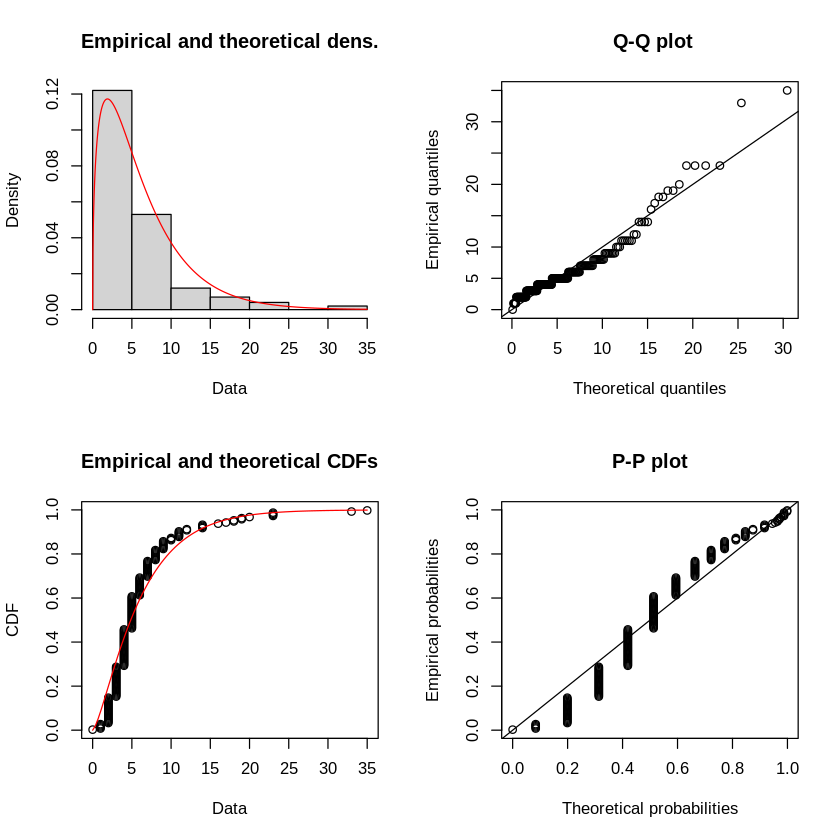

Fitting of the distribution ' gamma ' by maximum likelihood 
Parameters : 
       estimate Std. Error
shape 2.6215774 0.24728724
rate  0.2516852 0.02616125
Loglikelihood:  -628.1272   AIC:  1260.254   BIC:  1266.851 
Correlation matrix:
          shape      rate
shape 1.0000000 0.9074584
rate  0.9074584 1.0000000



=== ANÁLISE KMS_DRIVEN ===


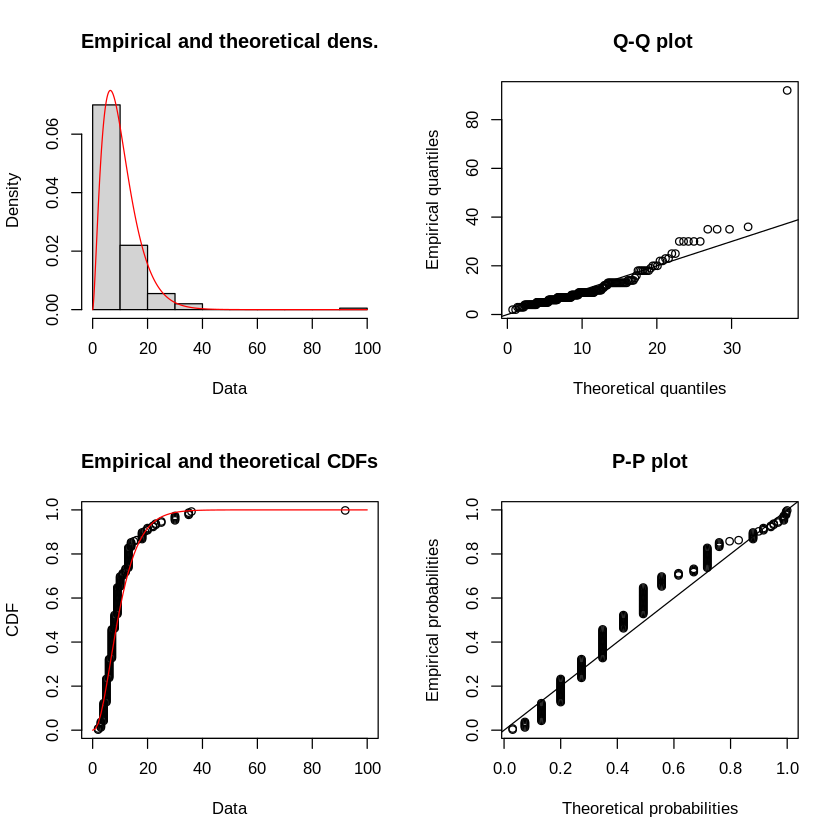

Fitting of the distribution ' norm ' by maximum likelihood 
Parameters : 
     estimate Std. Error
mean 41404.88   1677.722
sd   27347.19   1369.854
Loglikelihood:  -2327.062   AIC:  4658.123   BIC:  4664.72 
Correlation matrix:
     mean sd
mean    1  0
sd      0  1



=== ANÁLISE SELLING_PRICE ===


Fitting of the distribution ' gamma ' by maximum likelihood 
Parameters : 
       estimate
shape 1.4347077
rate  0.2304751
Loglikelihood:  -429496729400   AIC:  858993458804   BIC:  858993458811 

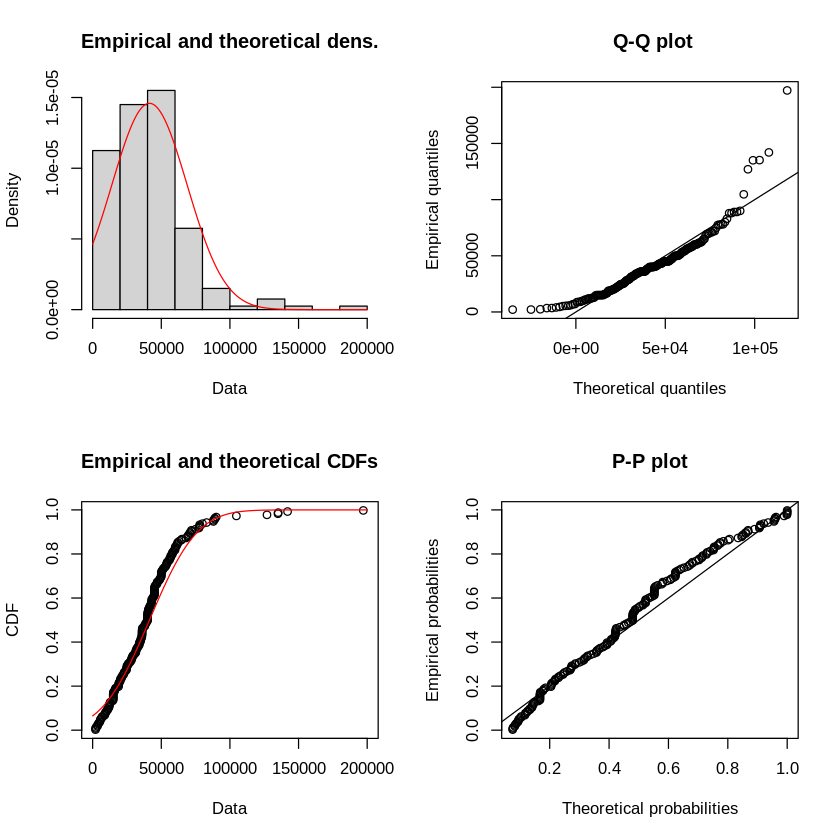

In [160]:
# Análise para Selling_Price
fit_selling <- fitdist(cars$Selling_Price, "gamma")
plot(fit_selling)
# Análise para Present_Price
cat("=== ANÁLISE PRESENT_PRICE ===\n")
fit_present <- fitdist(cars$Present_Price, "gamma")
plot(fit_present)
summary(fit_present)

# Análise para Kms_Driven
cat("\n=== ANÁLISE KMS_DRIVEN ===\n")
fit_driven <- fitdist(cars$Kms_Driven, "norm")
plot(fit_driven)
summary(fit_driven)
cat("\n=== ANÁLISE SELLING_PRICE ===\n")
summary(fit_selling)

In [161]:
tab_1 <- table(cars$Seller_Type, cars$Transmission)
tab_freq_abs <- rbind(
  cbind(tab_1,
        round(100*margin.table(tab_1,1)/sum(margin.table(tab_1,1),2))),
  c(margin.table(tab_1,2),
        sum(round(100*(margin.table(tab_1,1)/sum(margin.table(tab_1,1),2))))))

dimnames(tab_freq_abs)[[1]][nrow(tab_freq_abs)] <- "total_linha"
dimnames(tab_freq_abs)[[2]][ncol(tab_freq_abs)] <- "total_coluna"
kable(tab_freq_abs)



|            | Automatic| Manual| total_coluna|
|:-----------|---------:|------:|------------:|
|Dealer      |        29|    166|           97|
|Individual  |         2|      3|            2|
|total_linha |        31|    169|           99|

In [162]:
tab_21 <- table(cars$Fuel_Type, cars$Transmission)
tab_freq_abs <- rbind(
  cbind(tab_21,margin.table(tab_21,1)),
  c(margin.table(tab_21,2), sum(margin.table(tab_21,1))))

dimnames(tab_freq_abs)[[1]][nrow(tab_freq_abs)] <- "total_linha"
dimnames(tab_freq_abs)[[2]][ncol(tab_freq_abs)] <- "total_coluna"
kable(tab_freq_abs)



|            | Automatic| Manual| total_coluna|
|:-----------|---------:|------:|------------:|
|CNG         |         0|      2|            2|
|Diesel      |        12|     48|           60|
|Petrol      |        19|    119|          138|
|total_linha |        31|    169|          200|

In [163]:
tab_2 <- round(100 * prop.table(tab_1))
tab_frq_rel <- rbind(
  cbind(
    tab_2,
    round(100 * margin.table(prop.table(tab_1), 1))
  ),
  c(
    round(100 * margin.table(prop.table(tab_1), 2)),
    sum(round(100 * margin.table(prop.table(tab_1), 1)))
  )
)
dimnames(tab_frq_rel)[[1]] <- c(dimnames(tab_1)[[1]], "total_linha")
dimnames(tab_frq_rel)[[2]] <- c(dimnames(tab_1)[[2]], "total_coluna")
kable(tab_frq_rel)



|            | Automatic| Manual| total_coluna|
|:-----------|---------:|------:|------------:|
|Dealer      |        14|     83|           98|
|Individual  |         1|      2|            2|
|total_linha |        16|     84|          100|

In [164]:
tab_freq_abs <- cbind(tab_21, total_coluna = rowSums(tab_21))
tab_freq_abs <- rbind(tab_freq_abs, total_linha = c(colSums(tab_21), sum(tab_21)))
kable(tab_freq_abs)



|            | Automatic| Manual| total_coluna|
|:-----------|---------:|------:|------------:|
|CNG         |         0|      2|            2|
|Diesel      |        12|     48|           60|
|Petrol      |        19|    119|          138|
|total_linha |        31|    169|          200|

In [165]:
tab_1 <- table(cars$Seller_Type, cars$Transmission)
chisq.test(tab_1)

Warning message in chisq.test(tab_1):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test with Yates' continuity correction

data:  tab_1
X-squared = 0.82321, df = 1, p-value = 0.3642


In [166]:
tab_2 <- table(cars$Fuel_Type, cars$Transmission)
chisq.test(tab_2)

Warning message in chisq.test(tab_2):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tab_2
X-squared = 1.6106, df = 2, p-value = 0.447


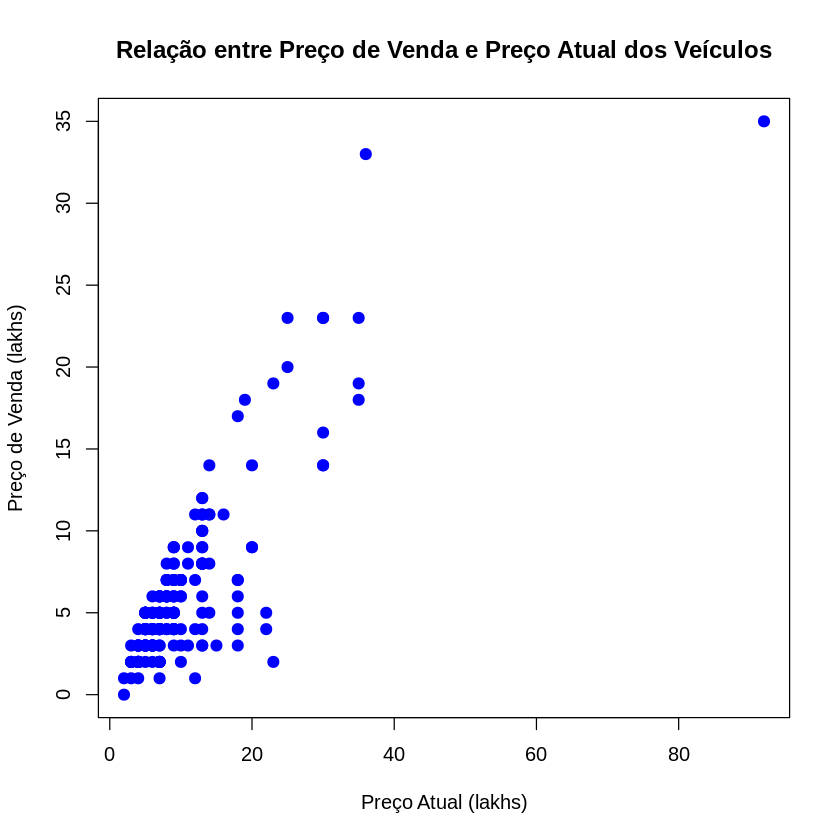

In [167]:
plot(cars$Present_Price, cars$Selling_Price,
      main = "Relação entre Preço de Venda e Preço Atual dos Veículos",
      xlab = "Preço Atual (lakhs)",
      ylab = "Preço de Venda (lakhs)",
      pch = 19, col = "blue",
      cex = 1.2)

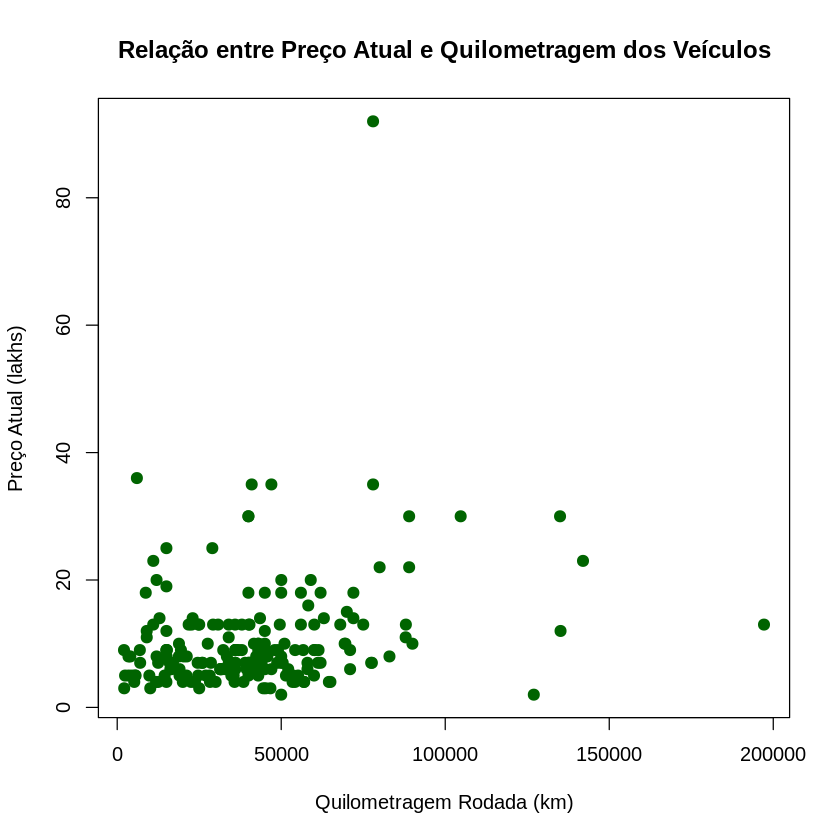

In [168]:
plot(cars$Kms_Driven, cars$Present_Price,
     main = "Relação entre Preço Atual e Quilometragem dos Veículos",
     xlab = "Quilometragem Rodada (km)",
     ylab = "Preço Atual (lakhs)",
     pch = 19, col = "darkgreen",
     cex = 1.2)

In [169]:
cor(cars$Present_Price, cars$Selling_Price)
cor.test(cars$Present_Price, cars$Selling_Price)

[1] 0.823729


	Pearson's product-moment correlation

data:  cars$Present_Price and cars$Selling_Price
t = 20.443, df = 198, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7733729 0.8637557
sample estimates:
     cor 
0.823729 


In [170]:
cor(cars$Kms_Driven, cars$Present_Price)
cor.test(cars$Kms_Driven, cars$Present_Price)

[1] 0.2507645


	Pearson's product-moment correlation

data:  cars$Kms_Driven and cars$Present_Price
t = 3.645, df = 198, p-value = 0.0003416
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1160614 0.3764097
sample estimates:
      cor 
0.2507645 


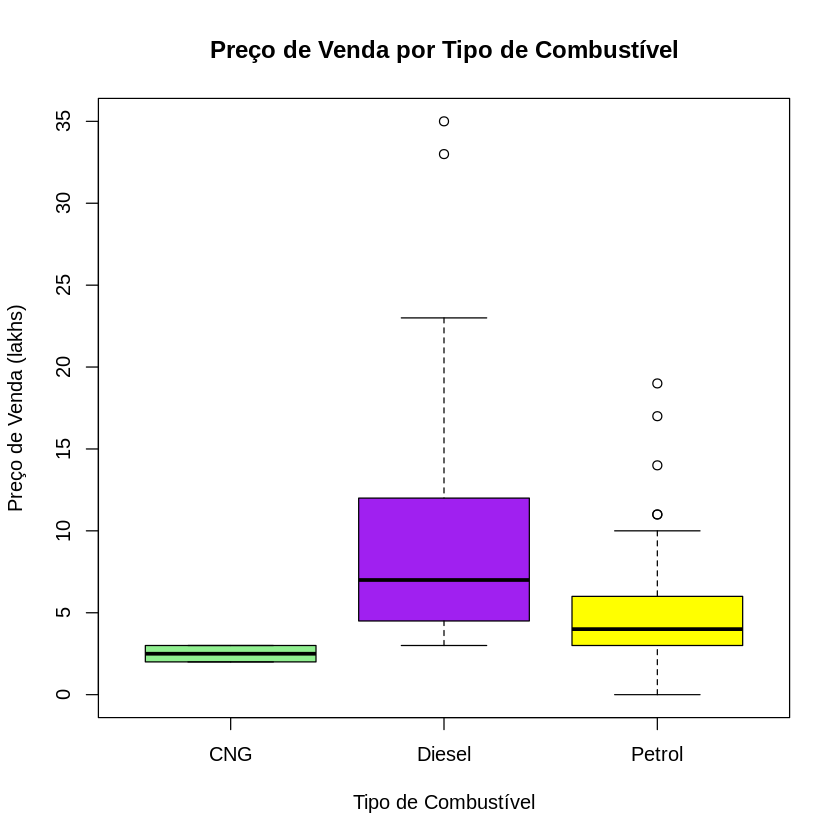

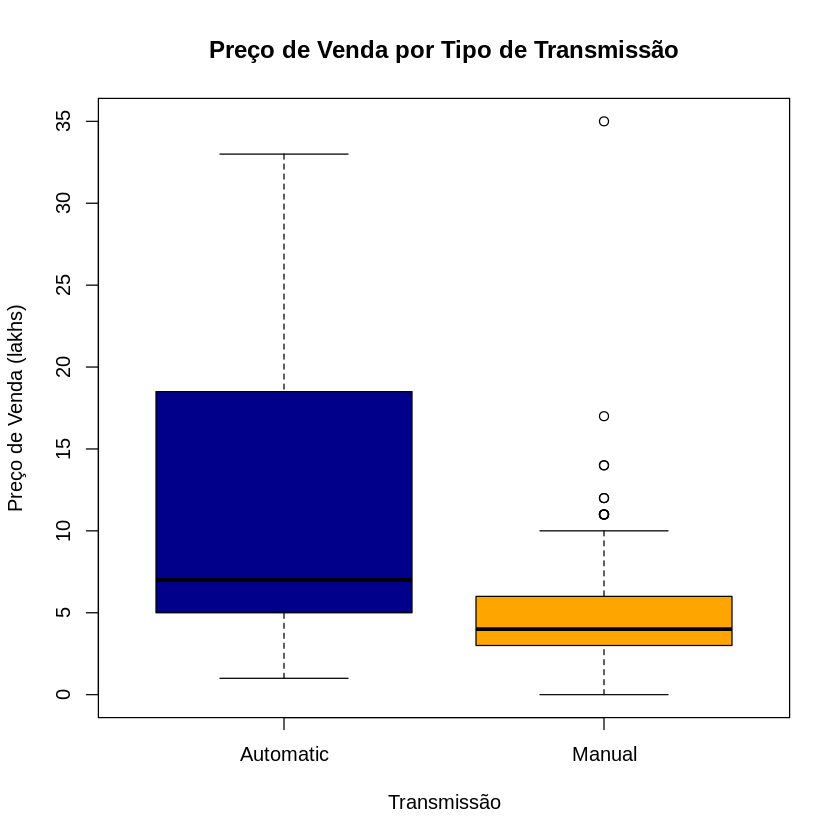

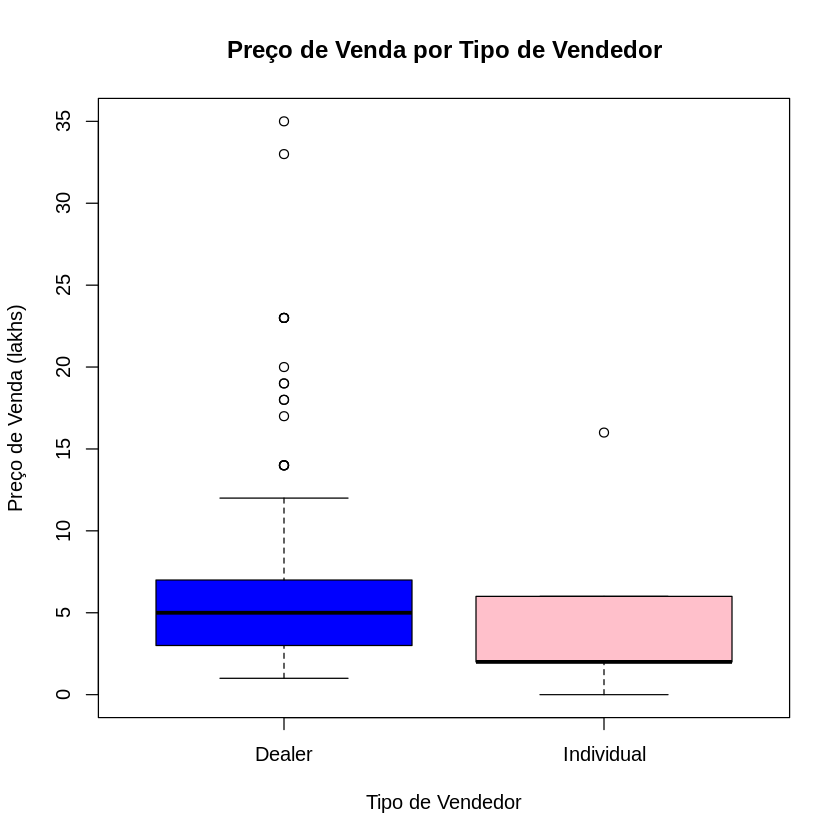

In [171]:
boxplot(Selling_Price ~ Fuel_Type, data = cars,
        main = "Preço de Venda por Tipo de Combustível",
        xlab = "Tipo de Combustível",
        ylab = "Preço de Venda (lakhs)",
        col = c("lightgreen", "purple", "yellow"))

boxplot(Selling_Price ~ Transmission, data = cars,
        main = "Preço de Venda por Tipo de Transmissão",
        xlab = "Transmissão",
        ylab = "Preço de Venda (lakhs)",
        col = c("darkblue", "orange"))

boxplot(Selling_Price ~ Seller_Type, data = cars,
        main = "Preço de Venda por Tipo de Vendedor",
        xlab = "Tipo de Vendedor",
        ylab = "Preço de Venda (lakhs)",
        col = c("blue", "pink"))